In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib as mpl

In [2]:
hours = pd.read_csv('hour.csv', low_memory=False)
hours = hours.replace([np.inf, -np.inf], np.nan).dropna()
days = pd.read_csv('day.csv', low_memory=False)
days = days.replace([np.inf, -np.inf], np.nan).dropna()

In [3]:
days.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,1/1/2011,1.0,0.0,1.0,0.0,6.0,0.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,1/2/2011,1.0,0.0,1.0,0.0,0.0,0.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,1/3/2011,1.0,0.0,1.0,0.0,1.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,1/4/2011,1.0,0.0,1.0,0.0,2.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,1/5/2011,1.0,0.0,1.0,0.0,3.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,4/6/2011,2.0,0.0,4.0,0.0,3.0,1.0,1.0,16.024153,19.38040,47.0833,17.625221,413.0,2395.0,2808.0
96,97.0,4/7/2011,2.0,0.0,4.0,0.0,4.0,1.0,1.0,17.937500,21.68480,60.2917,10.874904,571.0,2570.0,3141.0
97,98.0,4/8/2011,2.0,0.0,4.0,0.0,5.0,1.0,2.0,13.769153,16.22395,83.6250,15.208464,172.0,1299.0,1471.0
98,99.0,4/9/2011,2.0,0.0,4.0,0.0,6.0,0.0,2.0,14.042500,17.07645,87.7500,8.916561,879.0,1576.0,2455.0


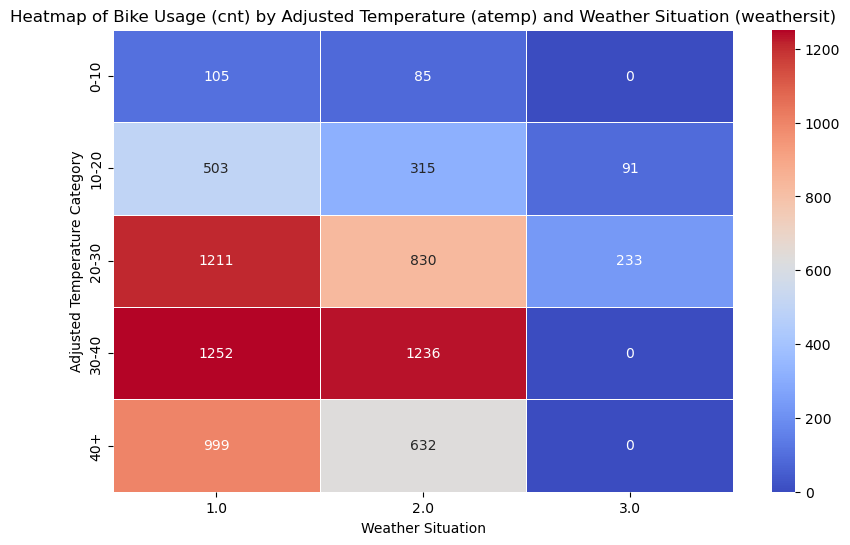

In [4]:
# Define the temperature bins with np.inf for the upper bound
bins = [0, 10, 20, 30, 40, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40+']
weather_atemp = days.copy()
weather_atemp['atemp_category'] = pd.cut(weather_atemp['atemp'], bins=bins, labels=labels, right=False)

# Create a pivot table with mean 'cnt' for each combination of 'weathersit' and 'atemp_category'
pivot_table = weather_atemp.pivot_table(values='casual', index='atemp_category', columns='weathersit', aggfunc='mean')
pivot_table.fillna(0, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Bike Usage (cnt) by Adjusted Temperature (atemp) and Weather Situation (weathersit)')
plt.xlabel('Weather Situation')
plt.ylabel('Adjusted Temperature Category')
plt.show()

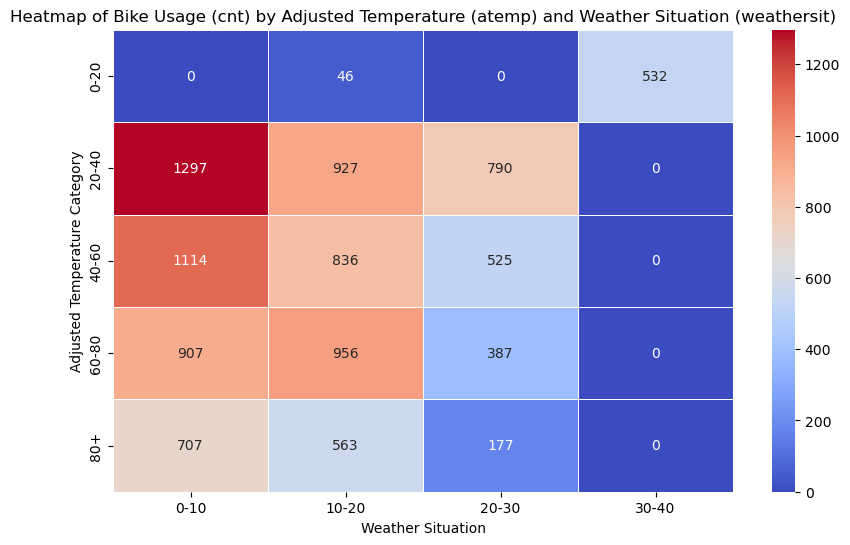

In [5]:
# Define the temperature bins with np.inf for the upper bound
bins_hum = [0, 20, 40, 60, 80, 100]
bins_wind = [0, 10, 20, 30, 40, np.inf]
labels_hum = ['0-20', '20-40', '40-60', '60-80', '80+']
labels_wind = ['0-10', '10-20', '20-30', '30-40', '40+']
hum_atemp = days.copy()
hum_atemp['hum_category'] = pd.cut(hum_atemp['hum'], bins=bins_hum, labels=labels_hum, right=False)
hum_atemp['windspeed_category'] = pd.cut(hum_atemp['windspeed'], bins=bins_wind, labels=labels_wind, right=False)

# Create a pivot table with mean 'cnt' for each combination of 'weathersit' and 'atemp_category'
pivot_table = hum_atemp.pivot_table(values='casual', index='hum_category', columns='windspeed_category', aggfunc='mean')
pivot_table.fillna(0, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Bike Usage (cnt) by Adjusted Temperature (atemp) and Weather Situation (weathersit)')
plt.xlabel('Weather Situation')
plt.ylabel('Adjusted Temperature Category')
plt.show()

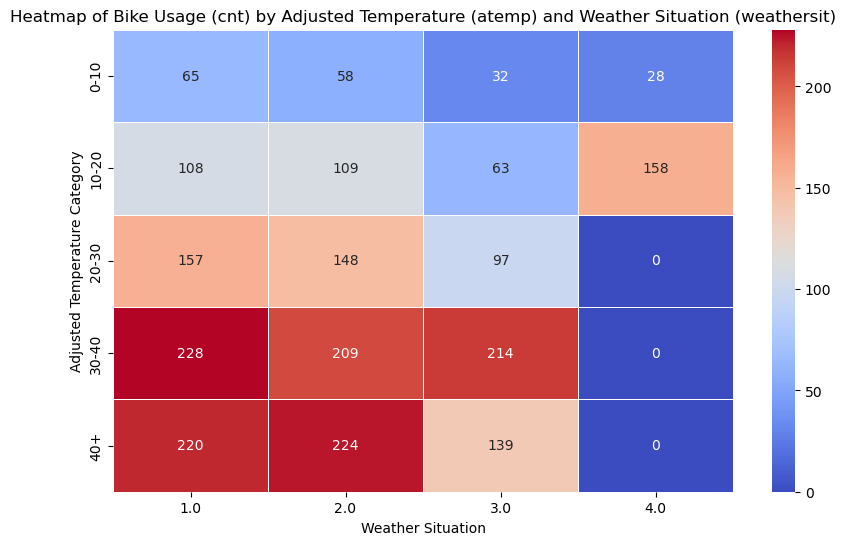

In [6]:
# Define the temperature bins with np.inf for the upper bound
bins = [0, 10, 20, 30, 40, np.inf]
labels = ['0-10', '10-20', '20-30', '30-40', '40+']
weather_atemp = hours.copy()
weather_atemp['atemp_category'] = pd.cut(weather_atemp['atemp'], bins=bins, labels=labels, right=False)

# Create a pivot table with mean 'cnt' for each combination of 'weathersit' and 'atemp_category'
pivot_table = weather_atemp.pivot_table(values='registered', index='atemp_category', columns='weathersit', aggfunc='mean')
pivot_table.fillna(0, inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Bike Usage (cnt) by Adjusted Temperature (atemp) and Weather Situation (weathersit)')
plt.xlabel('Weather Situation')
plt.ylabel('Adjusted Temperature Category')
plt.show()

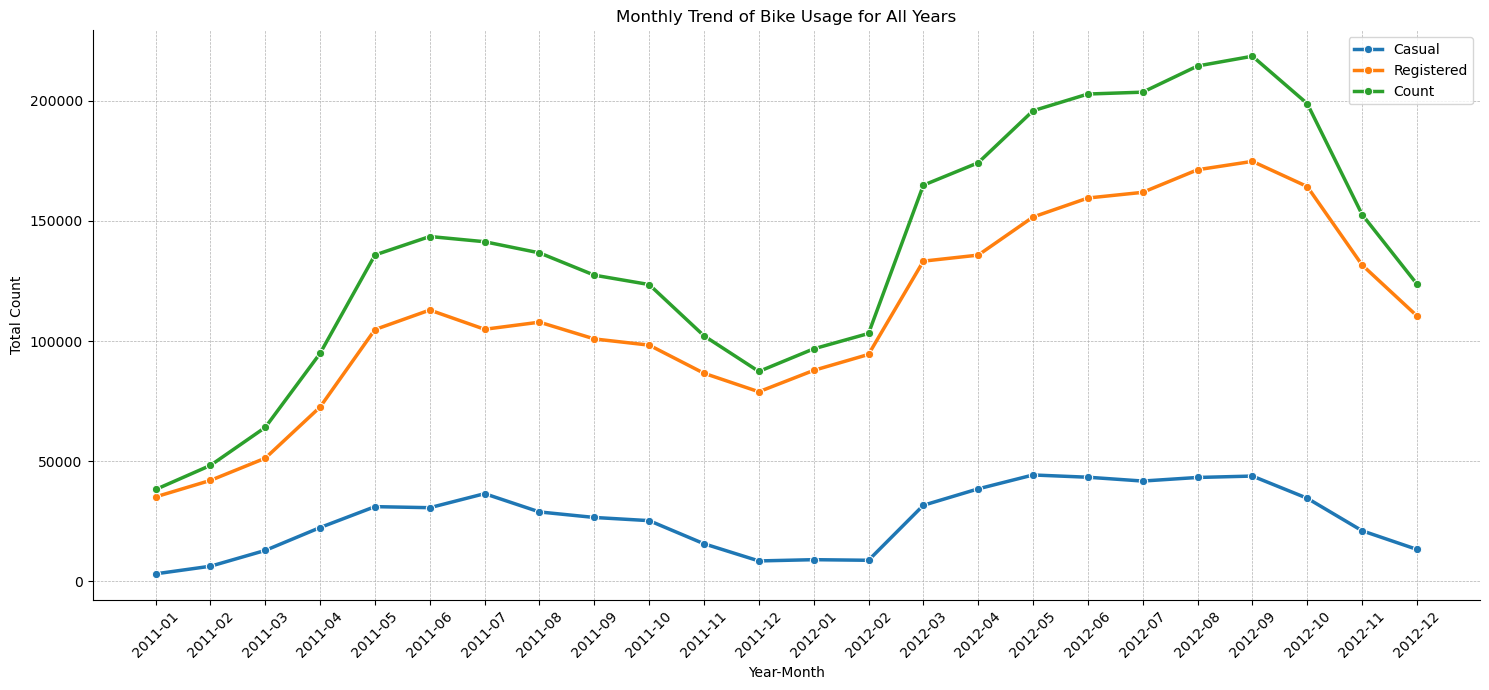

In [7]:
cnt_monthly = days.copy()
cnt_monthly['dteday'] = pd.to_datetime(cnt_monthly['dteday'])
cnt_monthly['year'] = cnt_monthly['dteday'].dt.year
cnt_monthly['month'] = cnt_monthly['dteday'].dt.month

# Group by year and month and aggregate the total counts
monthly_trends = cnt_monthly.groupby(['year', 'month']).agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'}).reset_index()

# Plotting the multi-line chart
plt.figure(figsize=(15, 7))

# Create a 'year_month' column for plotting that combines the year and month
monthly_trends['year_month'] = monthly_trends['year'] + (monthly_trends['month'] - 1) / 12

# Sort the DataFrame based on the new 'year_month' column to ensure correct plotting order
monthly_trends = monthly_trends.sort_values('year_month')

# Plotting lines for each category with seaborn for better visuals
sns.lineplot(x='year_month', y='casual', data=monthly_trends, marker='o', label='Casual', linewidth=2.5)
sns.lineplot(x='year_month', y='registered', data=monthly_trends, marker='o', label='Registered', linewidth=2.5)
sns.lineplot(x='year_month', y='cnt', data=monthly_trends, marker='o', label='Count', linewidth=2.5)

# Formatting the x-axis to show month and year
plt.xticks(monthly_trends['year_month'], [f'{int(year)}-{int(month):02d}' for year, month in zip(monthly_trends['year'], monthly_trends['month'])], rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Count')
plt.title('Monthly Trend of Bike Usage for All Years')
plt.legend()

# Show grid lines and set the background style
plt.grid(True, linestyle='--', linewidth=0.5)
sns.despine()  # Remove the top and right spines from plot

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

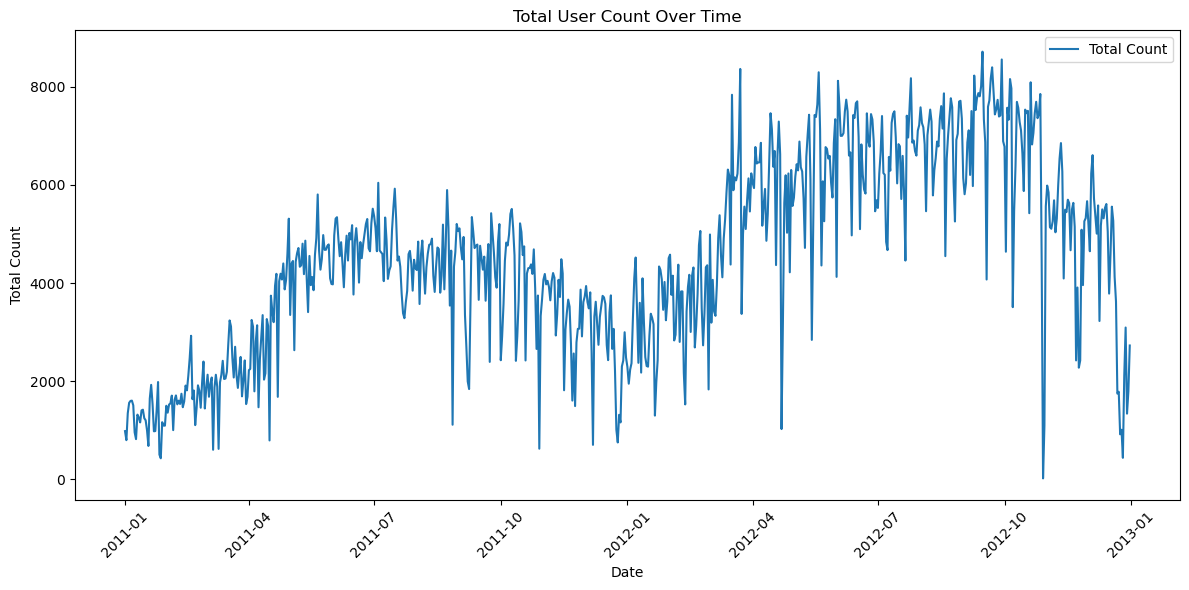

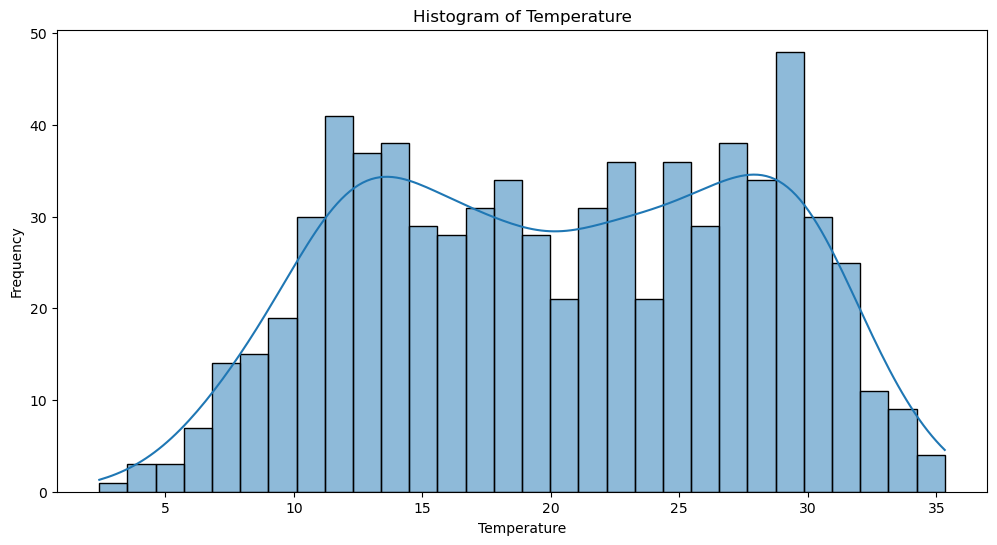

In [49]:
dtedady = days.copy()
dtedady['dteday'] = pd.to_datetime(dtedady['dteday'])

# 1. Time Series Analysis: Line Graph of total count over time
plt.figure(figsize=(12, 6))
plt.plot(dtedady['dteday'], dtedady['cnt'], label='Total Count')
plt.title('Total User Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dtedady['temp'], bins=30, kde=True)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

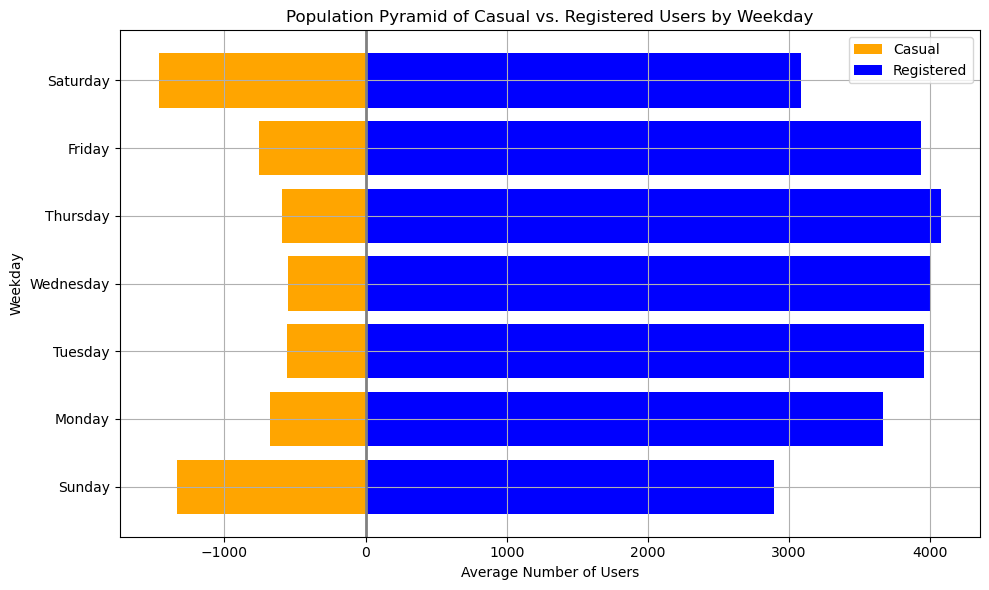

In [43]:
average_users_weekday = days.copy().groupby('weekday')[['casual', 'registered']].mean()

# Create a Population Pyramid
plt.figure(figsize=(10, 6))

# Plotting casual users (negative values for left side of the pyramid)
plt.barh(average_users_weekday.index, -average_users_weekday['casual'], color='orange', label='Casual')

# Plotting registered users (positive values for right side of the pyramid)
plt.barh(average_users_weekday.index, average_users_weekday['registered'], color='blue', label='Registered')

# Customizing the plot
plt.xlabel('Average Number of Users')
plt.ylabel('Weekday')
plt.title('Population Pyramid of Casual vs. Registered Users by Weekday')
plt.yticks(average_users_weekday.index, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.legend(loc='upper right')
plt.grid(True)
plt.axvline(x=0, color='grey', lw=2)  # Add a vertical line at zero
plt.tight_layout()

# Showing the plot
plt.show()

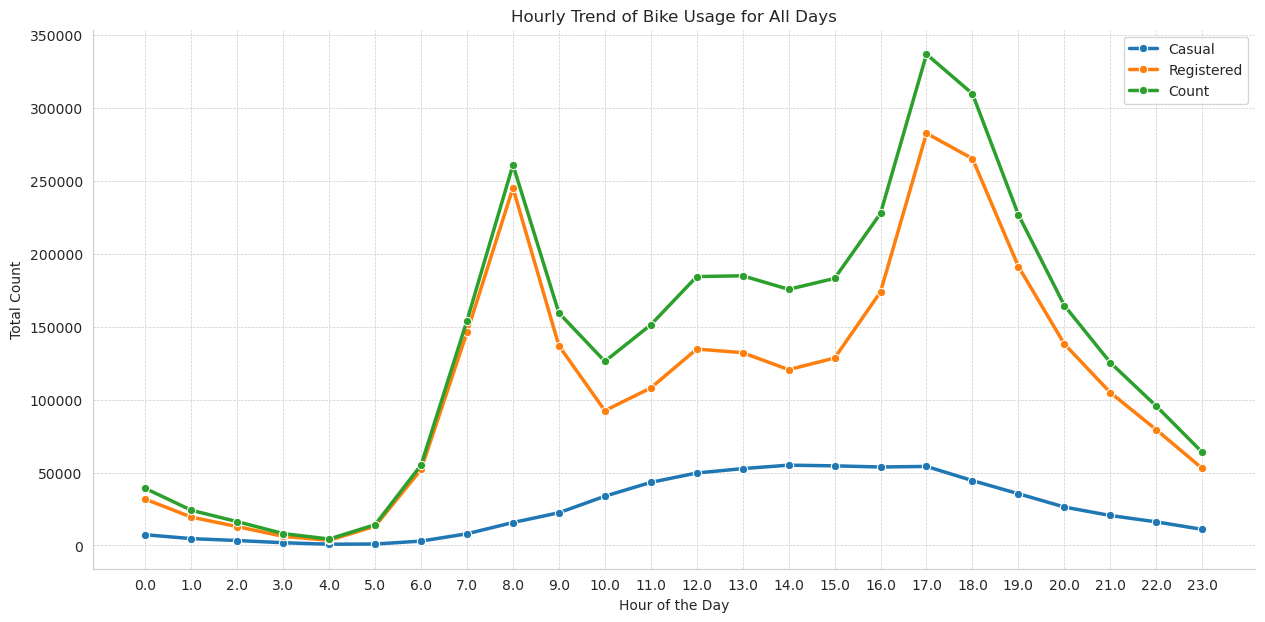

In [8]:
cnt_hourly = hours.copy()
hourly_trends = cnt_hourly.groupby('hr').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'}).reset_index()

# Set the style of seaborn for more attractive plots
sns.set_style("whitegrid")

# Plotting the multi-line chart with seaborn for better aesthetics
plt.figure(figsize=(15, 7))

# Plotting lines for each category with seaborn for better visuals
sns.lineplot(x='hr', y='casual', data=hourly_trends, marker='o', label='Casual', linewidth=2.5)
sns.lineplot(x='hr', y='registered', data=hourly_trends, marker='o', label='Registered', linewidth=2.5)
sns.lineplot(x='hr', y='cnt', data=hourly_trends, marker='o', label='Count', linewidth=2.5)

# Formatting the x-axis to show hours
plt.xticks(hourly_trends['hr'], hourly_trends['hr'])
plt.xlabel('Hour of the Day')
plt.ylabel('Total Count')
plt.title('Hourly Trend of Bike Usage for All Days')
plt.legend()

# Show grid lines and set the background style
plt.grid(True, linestyle='--', linewidth=0.5)
sns.despine()  # Remove the

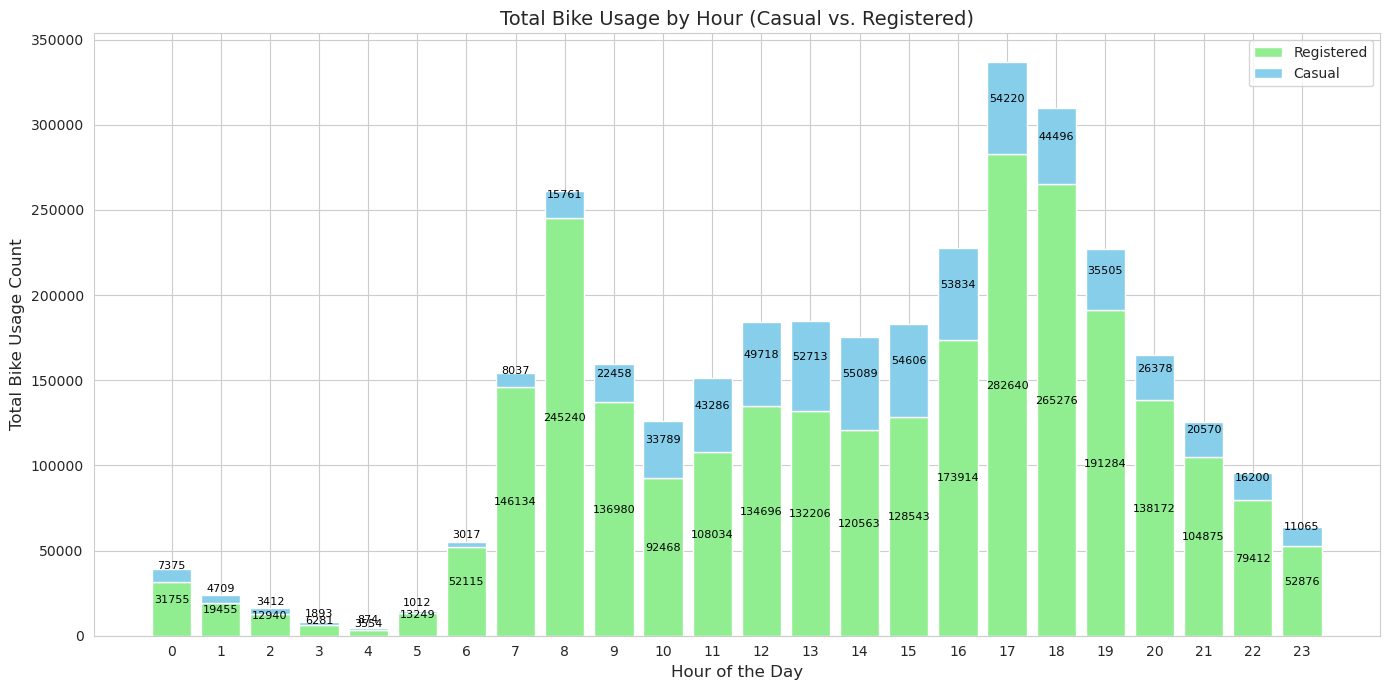

In [14]:
hourly = hours.copy()
hourly_usage = hourly.groupby('hr').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

colors = ['skyblue', 'lightgreen']

# Create a stacked bar chart with specified colors
plt.figure(figsize=(14, 7))
bars1 = plt.bar(hourly_usage['hr'], hourly_usage['registered'], label='Registered', color=colors[1])
bars2 = plt.bar(hourly_usage['hr'], hourly_usage['casual'], bottom=hourly_usage['registered'], label='Casual', color=colors[0])

# Add labels to each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height/2),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8, color='black')

add_labels(bars1)
add_labels(bars2)

# Add labels and title with a larger font for a classier look
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Bike Usage Count', fontsize=12)
plt.title('Total Bike Usage by Hour (Casual vs. Registered)', fontsize=14)

# Set x-ticks to show every hour
plt.xticks(hourly_usage['hr'])

# Add a legend with a frame for a more polished look
plt.legend(frameon=True)

# Tight layout for a neat presentation
plt.tight_layout()

# Show the plot
plt.show()

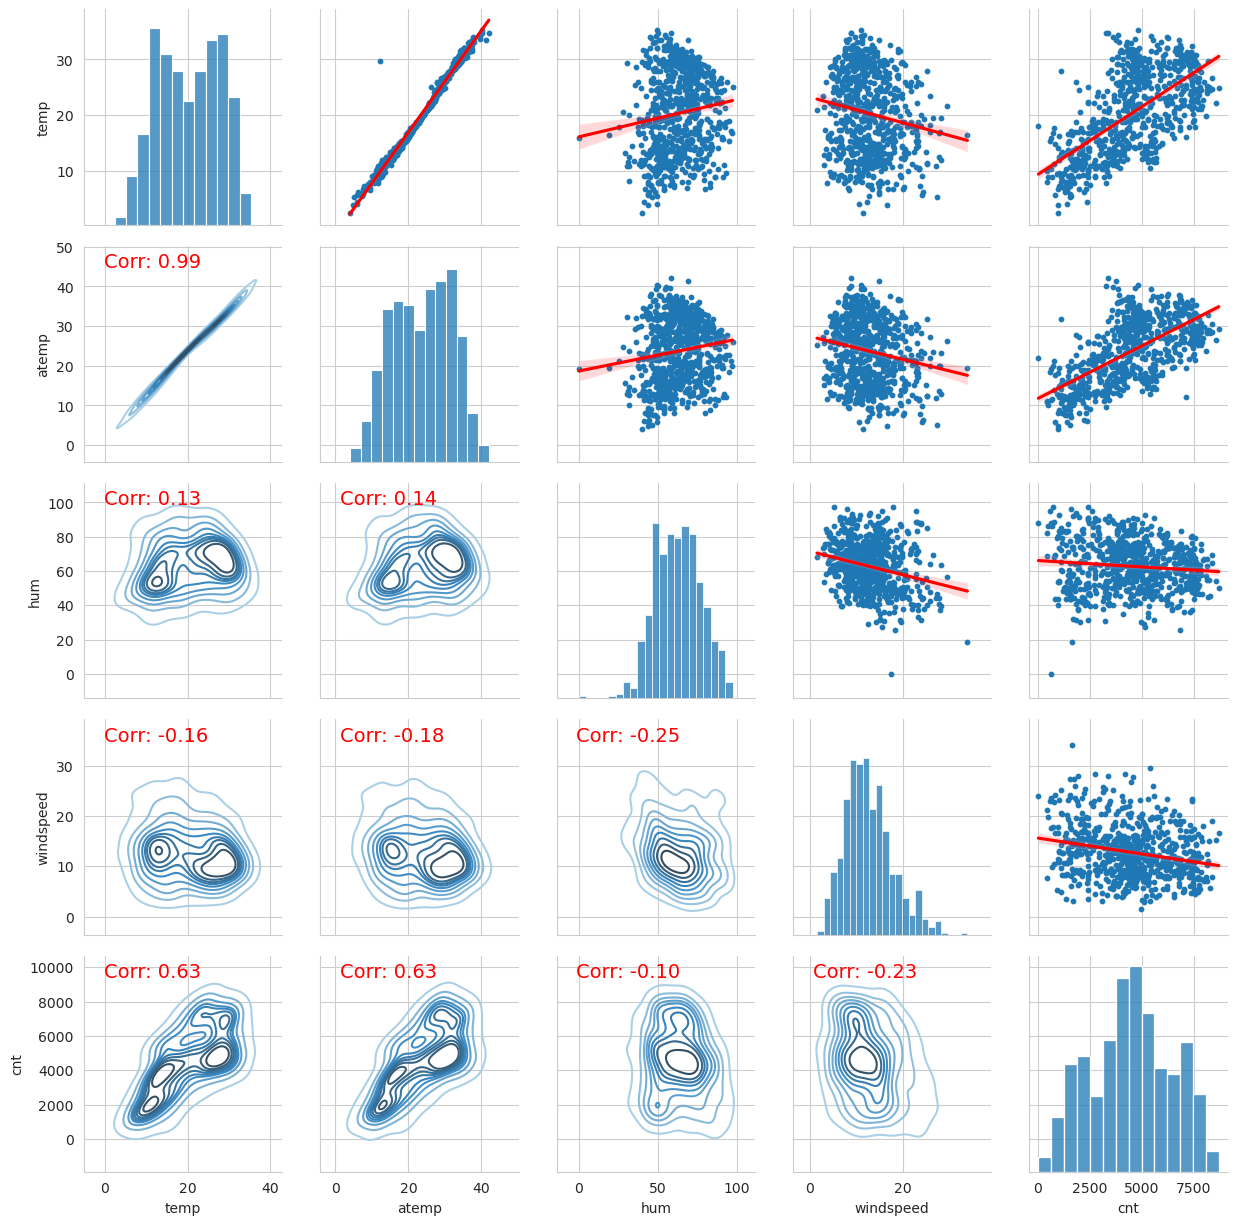

In [11]:

correlations = days.copy()
variables_to_plot = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Create a pair plot with histograms on the diagonal and scatter plots off the diagonal
pair_plot = sns.PairGrid(correlations[variables_to_plot])
pair_plot.map_upper(plt.scatter, s=10)
pair_plot.map_lower(sns.kdeplot, cmap="Blues_d")
pair_plot.map_diag(sns.histplot, kde_kws={'linewidth': 2})

# Calculate and add the correlation coefficients to the lower triangle of the pair plot
for i, j in zip(*np.tril_indices_from(pair_plot.axes, -1)):
    ax = pair_plot.axes[i, j]
    corr_value = correlations[variables_to_plot[i]].corr(correlations[variables_to_plot[j]])
    ax.annotate(f'Corr: {corr_value:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes, 
                color='red', fontsize=14)

# Iterate over the axes to add a regression line on the upper triangle scatter plots
for i, j in zip(*np.triu_indices_from(pair_plot.axes, 1)):
    ax = pair_plot.axes[i, j]
    sns.regplot(x=correlations[variables_to_plot[j]], y=correlations[variables_to_plot[i]], ax=ax, scatter=False, color='red')

# Show the plot
plt.show()

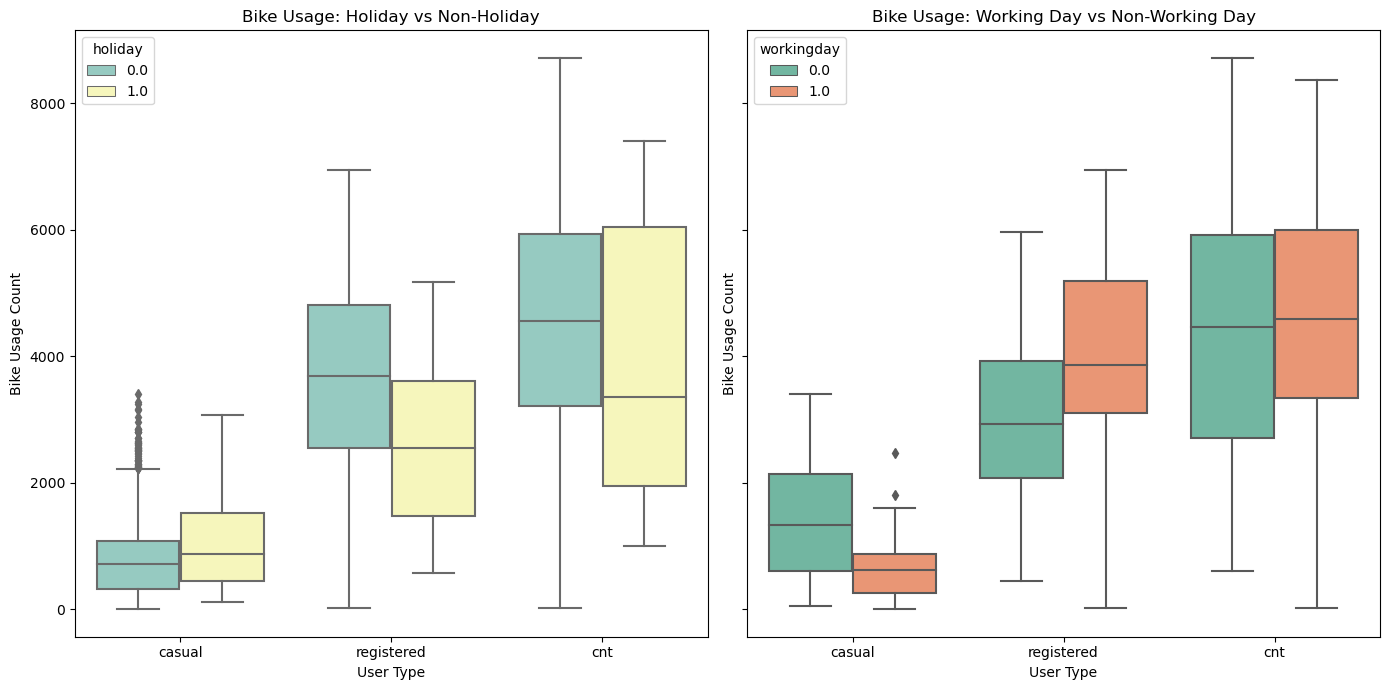

In [53]:
day_copy = days.copy()
melted_days = pd.melt(day_copy, id_vars=['holiday', 'workingday'], value_vars=['casual', 'registered', 'cnt'], var_name='User Type', value_name='Count')

# Create box plots for holiday and working day comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
sns.boxplot(ax=axes[0], x='User Type', y='Count', hue='holiday', data=melted_days, palette="Set3")
sns.boxplot(ax=axes[1], x='User Type', y='Count', hue='workingday', data=melted_days, palette="Set2")

# Titles and labels
axes[0].set_title('Bike Usage: Holiday vs Non-Holiday')
axes[1].set_title('Bike Usage: Working Day vs Non-Working Day')
for ax in axes:
    ax.set_xlabel('User Type')
    ax.set_ylabel('Bike Usage Count')
    ax.legend(title=ax.get_legend().get_title().get_text(), loc='upper left')

plt.tight_layout()
plt.show()

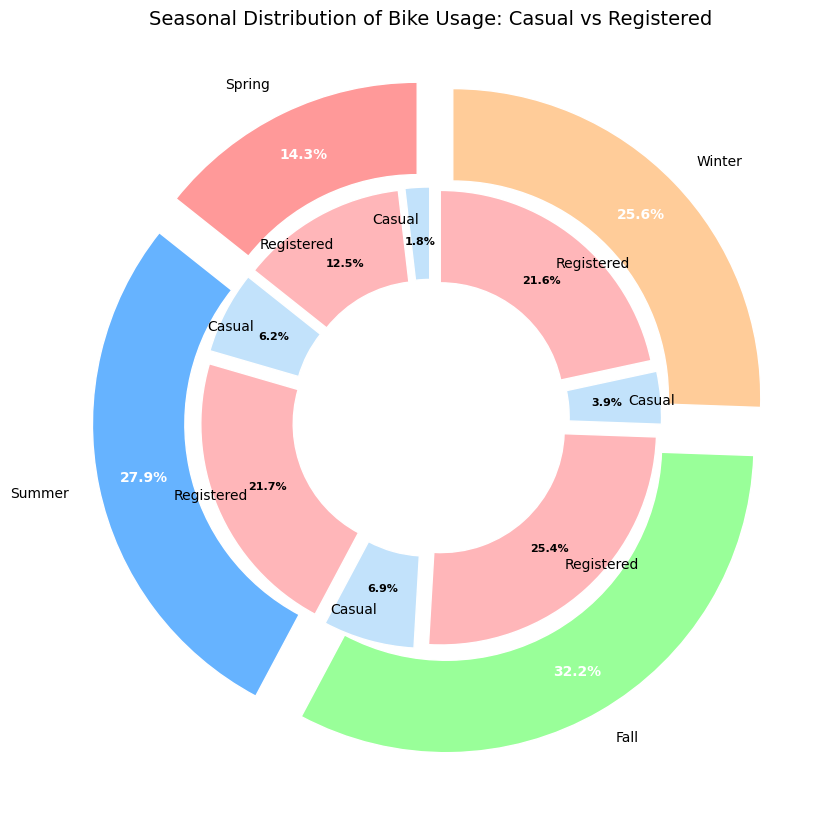

In [45]:
days_seasons = days.copy()
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Aggregate the data by season
season_data = days_seasons.groupby('season').agg({'casual': 'sum', 'registered': 'sum', 'cnt': 'sum'}).reset_index()

# Pie chart parameters
colors_season = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Colors for seasons
colors_user_type = ['#c2e2fb', '#ffb6b9']  # Colors for user types within seasons

# Create a pie chart for each user type
fig, ax = plt.subplots(figsize=(10, 10))

# Size of the two types of pie sections
size = 0.3

# Values for the outer pie (total counts - cnt)
outer_values = season_data['cnt']
outer_labels = [season_names[season] for season in season_data['season']]
outer_explode = (0.1,) * len(outer_values)

# Plot the outer pie
wedges1, texts1, autotexts1 = ax.pie(outer_values, labels=outer_labels, radius=1, colors=colors_season,
                                     autopct='%1.1f%%', startangle=90, explode=outer_explode,
                                     pctdistance=0.85, labeldistance=1.1, wedgeprops=dict(width=size, edgecolor='w'))

# Values for the inner pie (casual and registered counts)
inner_values = season_data[['casual', 'registered']].values.flatten()
inner_labels = ['Casual', 'Registered'] * len(season_data)
inner_explode = (0.05,) * len(inner_values) # Explode only 'casual'

# Plot the inner pie
wedges2, texts2, autotexts2 = ax.pie(inner_values, labels=inner_labels, radius=1 - size, colors=colors_user_type,
                                     autopct='%1.1f%%', startangle=90, explode=inner_explode,
                                     pctdistance=0.75, labeldistance=0.85, wedgeprops=dict(width=size, edgecolor='w'))

# Custom styling for the auto-pct labels
plt.setp(autotexts1, size=10, weight="bold", color="white")
plt.setp(autotexts2, size=8, weight="bold")

# Title for the pie chart
plt.title('Seasonal Distribution of Bike Usage: Casual vs Registered', fontsize=14)

# Show the plot
plt.show()

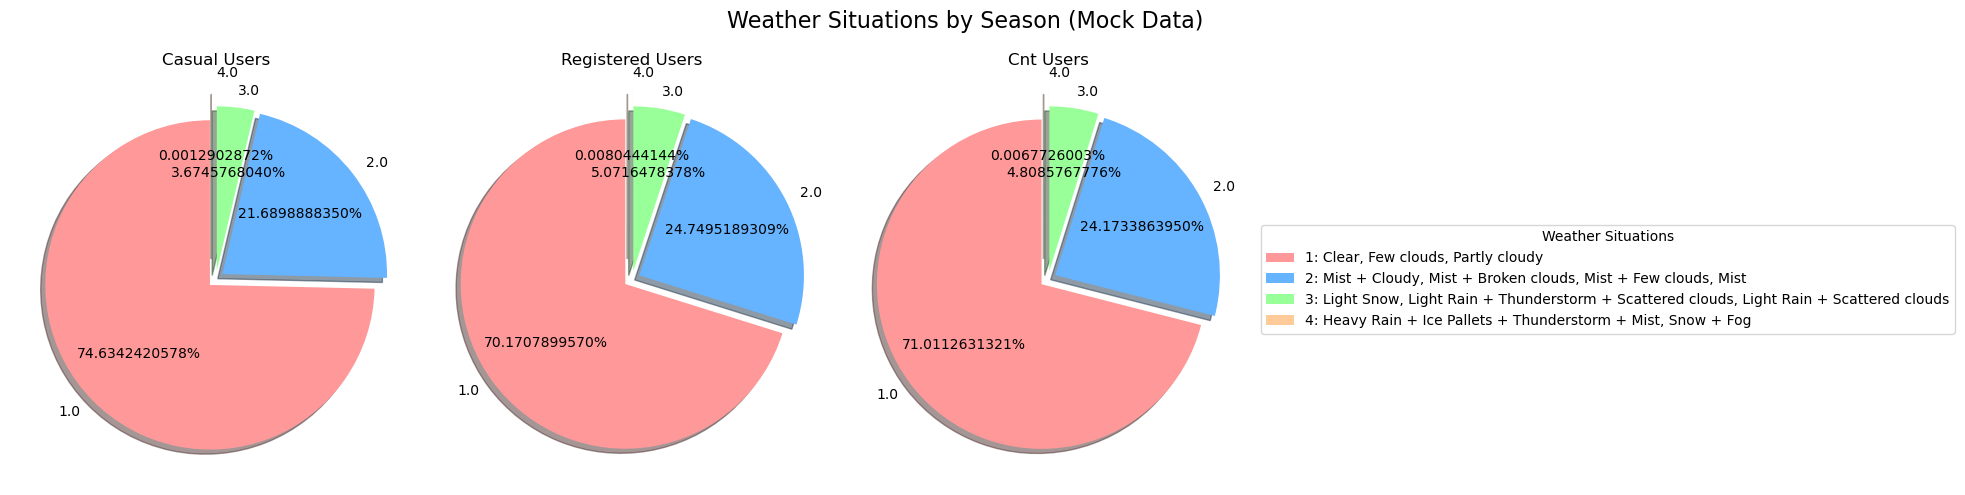

In [36]:
hour_weathersits = hours.copy()
weather_sums = hour_weathersits.groupby('weathersit').sum()


fig, axs = plt.subplots(1, 3, figsize=(20, 5))
user_types = ['casual', 'registered', 'cnt']
explode = (0.05, 0.05, 0.05, 0.15)

# Plot pie charts for each season with legends
for i, user_type in enumerate(user_types):
    data = weather_sums[user_type]
    wedges, texts, autotexts = axs[i].pie(data, labels=data.index, autopct='%1.10f%%', startangle=90, colors=colors, explode=explode, shadow=True)
    axs[i].set_title(f'{user_type.capitalize()} Users')

# Adding a legend
plt.legend(wedges, ['1: Clear, Few clouds, Partly cloudy', 
                    '2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                    '3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                    '4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'],
           title="Weather Situations", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.suptitle('Weather Situations by Season (Mock Data)', fontsize=16)
plt.tight_layout()
plt.show()


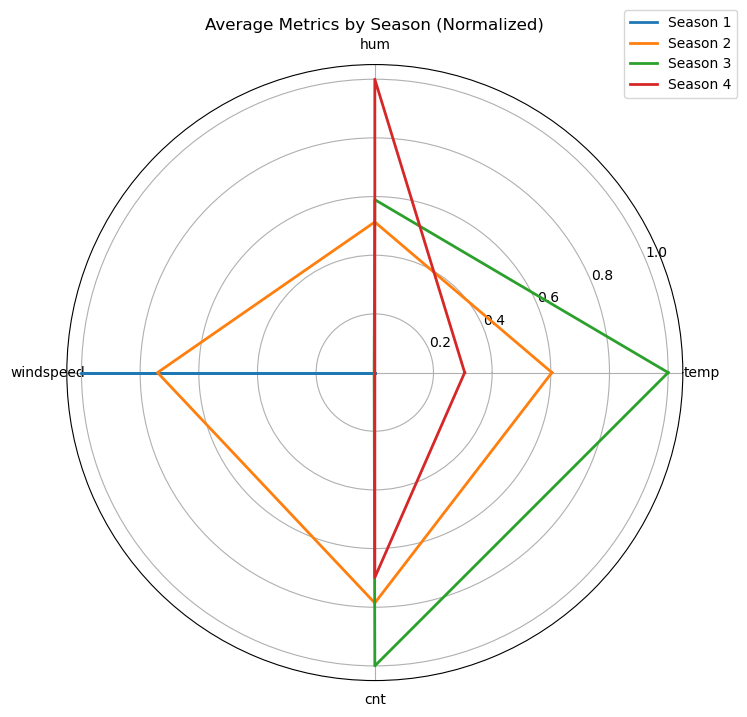

In [51]:
from math import pi

metrics = ['temp', 'hum', 'windspeed', 'cnt']
grouped_data = days.copy().groupby('season')[metrics].mean().reset_index()

# Normalizing the data (scaling between 0 and 1 for each metric)
for metric in metrics:
    max_val = grouped_data[metric].max()
    min_val = grouped_data[metric].min()
    grouped_data[metric] = (grouped_data[metric] - min_val) / (max_val - min_val)

# Number of variables
num_vars = len(metrics)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Ensure the graph is circular by repeating the first value at the end

# Radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one line per season
for i, row in grouped_data.iterrows():
    data_row = row[metrics].tolist()
    data_row += data_row[:1]  # Repeat the first value to close the circle
    ax.plot(angles, data_row, linewidth=2, linestyle='solid', label=f'Season {int(row["season"])}')

# Add labels for each metric
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Add a legend and title
plt.title('Average Metrics by Season (Normalized)')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()


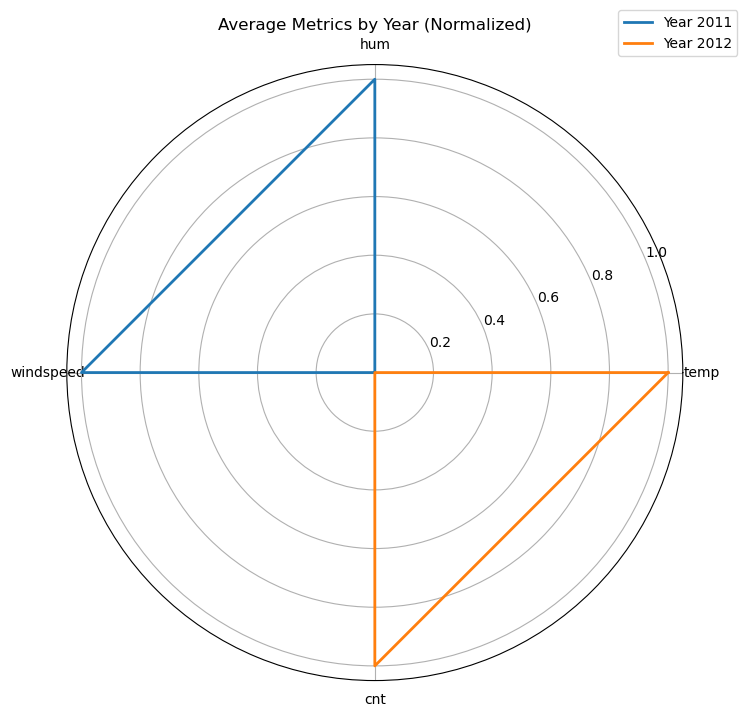

In [50]:
grouped_data_yearly = days.copy().groupby('yr')[metrics].mean().reset_index()

# Normalizing the data for the yearly comparison
for metric in metrics:
    max_val = grouped_data_yearly[metric].max()
    min_val = grouped_data_yearly[metric].min()
    grouped_data_yearly[metric] = (grouped_data_yearly[metric] - min_val) / (max_val - min_val)

# Radar chart for yearly comparison
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one line per year
for i, row in grouped_data_yearly.iterrows():
    data_row = row[metrics].tolist()
    data_row += data_row[:1]  # Repeat the first value to close the circle
    ax.plot(angles, data_row, linewidth=2, linestyle='solid', label=f'Year {2011 + int(row["yr"])}')  # Adjust year for labeling

# Add labels for each metric
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Add a legend and title
plt.title('Average Metrics by Year (Normalized)')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()